# Your first embedding

## Exercise objectives:

- Run your first RNN for NLP
- Get a first taste of what an embedding is

<hr>

Words are not something you can easily feed to a Neural Network. For this reason, we have to convert them to something more meaningful. 

And this is exactly what _Embeddings_ are for! They map any word onto a vectorial representation (this a fancy way to represent each word with a vector ;) ). For instance, the word `dog` can be represented by the vector $(w_1, w_2, ..., w_n)$ in the embedding space, and we will learn the weights $(w_k)_k$.

So let's just do it.

# The data

⚠️ **Warning** ⚠️ The `load_data` function has a `percentage_of_sentences` argument. Depending on your computer, there are chances that too many sentences will make your compute slow down, or even freeze - your RAM can overflow. For that reason, **you should start with 10% of the sentences** and see if your computer handles it. Otherwise, rerun with a lower number. 

⚠️ **DISCLAIMER** ⚠️ **No need to play _who has the biggest_ (RAM) !** The idea is to get to run your models quickly to prototype. Even in real life, it is recommended that you start with a subset of your data to loop and debug quickly. So increase the number only if you are into getting the best accuracy. 

In [1]:
###########################################
### Just run this cell to load the data ###
###########################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)

2025-08-26 15:48:50.531977: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 15:48:50.532557: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 15:48:50.535396: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 15:48:50.543478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-26 15:48:50.557383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Now that you have loaded the data, let's check it out!

❓ **Question** ❓ You can play with the data here. In particular, `X_train` and `X_test` are lists of sentences. Let's print some of them, with their respective label stored in `y_train` and `y_test`.

In [2]:
print(y_train[0], X_train[0])

0 ['this', 'was', 'an', 'absolutely', 'terrible', 'movie', "don't", 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', "movie's", 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudo', 'love', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', "actor's", 'like', 'christopher', "walken's", 'good', 'nam

In [3]:
print(y_test[10], X_test[10])

0 ["i'll", 'give', 'it', 'a', 'two', 'because', 'it', 'has', 'a', 'lot', 'of', 'music', 'otherwise', 'it', 'would', 'be', 'a', 'one', 'br', 'br', 'i', 'saw', 'this', 'movie', 'for', 'the', 'first', 'time', 'tonight', 'and', "it's", 'the', 'first', 'road', 'picture', "i've", 'seen', 'i', 'was', 'expecting', 'waaaaay', 'better', 'robert', 'osborn', 'says', 'this', 'is', 'the', 'best', 'of', 'the', 'road', 'movies', 'if', "that's", 'true', 'i', "needn't", 'bother', 'to', 'see', 'the', 'others', 'the', 'best', 'thing', 'about', 'this', 'movie', 'is', 'that', 'it', 'has', 'a', 'lot', 'of', 'songs', 'in', 'the', 'first', 'half', 'but', "that's", 'balanced', 'out', 'by', 'only', 'one', 'production', 'number', 'with', 'dancing', 'in', 'the', 'entire', 'movie', 'br', 'br', 'i', "didn't", 'like', 'the', 'movie', 'neither', 'hope', 'nor', 'crosby', 'came', 'across', 'all', 'that', 'well', 'their', 'characters', "weren't", 'very', 'charming', 'the', 'movie', 'was', 'not', 'funny', 'at', 'all', 'mo

**LABELS**: the task is a binary classification problem:
- label 0️⃣ corresponds to a <font color=red>negative</font> movie review
- label 1️⃣ corresponds to a <font color=green>positive</font> movie review

**INPUTS**: 
- 🧹 The data has been partially cleaned! So you don't have to worry about it in this exercise. 
- ❗️ But don't forget this step in real-life challenges. 

Remember that words are not computer-compatible materials? You have to tokenize them!

❓ **Question** ❓ Run the following cell to tokenize your sentences

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set!
# This tokenization also lowercases your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)

# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

Let's print some of the tokenized sentences to see what really happens

In [5]:
sentence_number = 100

input_raw = X_train[sentence_number]
input_token = X_train_token[sentence_number]

for i in range(40):
    print(f'Word : {input_raw[i]} -> Token {input_token[i]}')

Word : i -> Token 9
Word : enjoyed -> Token 579
Word : this -> Token 11
Word : movie -> Token 18
Word : and -> Token 3
Word : after -> Token 104
Word : watching -> Token 155
Word : it -> Token 10
Word : it -> Token 10
Word : made -> Token 90
Word : me -> Token 65
Word : wonder -> Token 574
Word : just -> Token 40
Word : how -> Token 84
Word : many -> Token 107
Word : 'caitlin -> Token 17238
Word : rose's' -> Token 17239
Word : exist -> Token 1632
Word : in -> Token 8
Word : the -> Token 1
Word : world -> Token 189
Word : how -> Token 84
Word : many -> Token 107
Word : other -> Token 82
Word : girls -> Token 526
Word : have -> Token 25
Word : been -> Token 76
Word : subjected -> Token 5574
Word : to -> Token 5
Word : this -> Token 11
Word : sort -> Token 406
Word : of -> Token 4
Word : sexual -> Token 991
Word : abuse -> Token 2393
Word : and -> Token 3
Word : torment -> Token 8200
Word : by -> Token 31
Word : classmates -> Token 7069
Word : and -> Token 3
Word : have -> Token 25


The dictionary that maps each word to a token can be accessed with `tokenizer.word_index`
    
Let's create a `vocab_size` variable that stores the number of different words (=tokens) in the train set. This is called the _size of the vocabulary_.

In [6]:
vocab_size = len(tokenizer.word_index)

print(f'There are {vocab_size} different words in the train set')

There are 30419 different words in the train set


Your `X_train_token` and `X_test_token` contain sequences of different lengths.

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/06-DL/NLP/padding.png" alt='Padding example' width="700px" />

However, a neural network has to have a tensor as input. For this reason, we have to pad our data.

❓ **Question** ❓  Pad your data with the `pad_sequences` function (documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)). Do not forget about the `dtype` and `padding` keywords (but do not use `maxlen` here).

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# The RNN

Let's now feed this data to a Recurrent Neural Network.

❓ **Question** ❓ Write a model that has:
- an embedding layer whose `input_dim` is the size of your vocabulary (= your `vocab_size`), and whose `output_dim` is the size of the embedding space you want to have
- a RNN (SimpleRNN, LSTM, GRU) layer
- a Dense layer
- an output layer

⚠️ **Warning** ⚠️ Here, you don't need a masking layer. Why? Because `layers.Embedding` has a argument to do that directly, which you have to set with `mask_zero=True`. That also means that your data **HAS TO** be padded with **0** (which is the default behavior). See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) to understand how it **impacts** the `input_dim`.

<details>
    <summary>💡 Hint</summary>

`input_dim` should equal size of vocabulary + 1

</details>

Compile it with the appropriate arguments

In [8]:
from tensorflow.keras import Sequential, Input, layers

embedding_dimension = 50

model = Sequential()

model.add(Input(shape=X_train_pad.shape[1:]))

model.add(layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dimension, mask_zero=True))
model.add(layers.LSTM(20))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

❓ **Question** ❓ Look at the number of parameters in your RNN. 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1164, 50)       │     1,521,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,526,901 (5.82 MB)

 Trainable params: 1,526,901 (5.82 MB)

 Non-trainable params: 0 (0.00 B)

❓ Double-check that the number of parameters in your embedding layer is equal to the (number of words in your vocabulary + 1 for the masking value) $\times$  the dimension of your embedding.

In [10]:
print(f'Expected number of parameters : {(vocab_size + 1) * embedding_dimension}')

Expected number of parameters : 1521000


❓ **Question** ❓ Start fitting your model with 20 epochs, with an early stopping criterion whose patience is equal to 4.

⚠️ **Warning** ⚠️ You might see that it takes a lot of time! 

**So stop it after a couple of iterations!**

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(X_train_pad, y_train,
          epochs=20,
          batch_size=16,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/20


2025-08-26 15:48:56.927904: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.5075 - loss: 0.6924 - val_accuracy: 0.6400 - val_loss: 0.6791
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.6930 - loss: 0.6298 - val_accuracy: 0.7800 - val_loss: 0.4864
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.8239 - loss: 0.4112 - val_accuracy: 0.7507 - val_loss: 0.5447
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.9339 - loss: 0.2088 - val_accuracy: 0.8187 - val_loss: 0.4203
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.9672 - loss: 0.1137 - val_accuracy: 0.8293 - val_loss: 0.4448
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9881 - loss: 0.0484 - val_accuracy: 0.8347 - val_loss: 0.4984
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.9821 - loss: 0.0638 - val_accuracy: 0.8227 - val_loss: 0.5983
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9893 - loss: 0.0387 - val

Let's not waste too much time just staring at our screen or having coffees. It is too early to start having breaks ;)

❓ **Question** ❓ We will reduce the computational time. To start, let's first look at how many words there are in the different sentences of your train set (Just run the following cell).

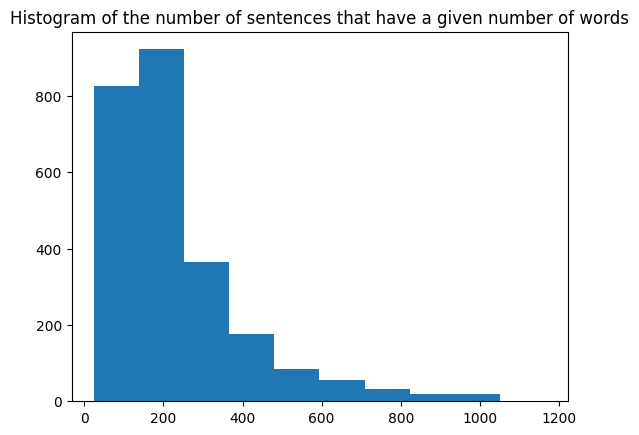

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)


You will probably see that 90 to 95% of your sentences have less than 300 words. And very few have more than 1000.

However, as you didn't use `maxlen` in your padding above, your input tensor has a dimension equal to the length of the sentence that has the maximum number of words.

Now, let's look at how this affects the padding: 


<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/06-DL/NLP/tensor_size.png" alt='Dimensions of the tensor' width="700px" />

Because of a few of very long sentences, one dimension of your tensor is equal to around 1000. However, most of the sentences with ~200 words have just padded values that are useless.

So your tensor is mostly useless information, which still adds time to the training process.

But what if you pad the data to a maximum length (`maxlen`) of say 200 (words)?
- First, that would increase the convergence and you would not need to stare at your screen while waiting for the algorithm to converge
- But in essence, do you really lose that much information? Do you think that you often need more than 200 words (up to 1000) to tell whether or not a sentence is positive of negative?

❓ **Question** ❓ For all these reasons, re-do your padding using the `maxlen` keyword and retrain the model!  See how much faster it is now - without hurting the performance ;)

In [13]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post', maxlen=200)

model.fit(X_train_pad, y_train,
          epochs=20,
          batch_size=16,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9555 - loss: 0.1330 - val_accuracy: 0.8173 - val_loss: 0.4717
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9842 - loss: 0.0606 - val_accuracy: 0.7960 - val_loss: 0.6129
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9929 - loss: 0.0278 - val_accuracy: 0.8293 - val_loss: 0.6103
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9924 - loss: 0.0258 - val_accuracy: 0.8013 - val_loss: 0.6966
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9967 - loss: 0.0147 - val_accuracy: 0.8187 - val_loss: 0.6828


🏁 Nice, you are now able to use `Tokenizer` and `pad_sequences`